**ATTILA** ELANG PERKASA
G.231.21**.0140**

Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya
untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands
tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
print('ukuran dataset: %d baris dan %d kolom\n' %dataset.shape)
print('Lima data teratas:')
print (dataset.head())
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1
tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain).
Beri anotasi untuk titik lonjakan tersebut.


Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1
tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain).
Beri anotasi untuk titik lonjakan tersebut.


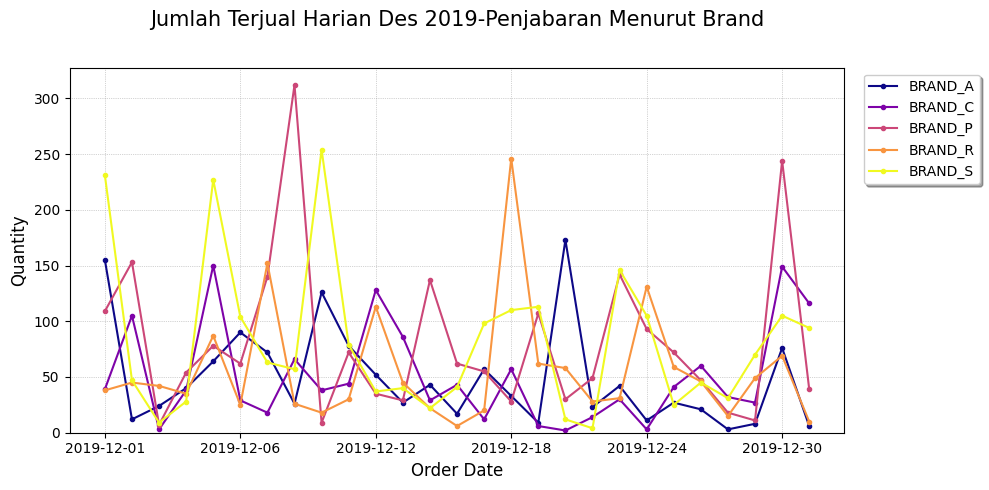

In [7]:

top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))


dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Jumlah Terjual Harian Des 2019-Penjabaran Menurut Brand',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan
barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

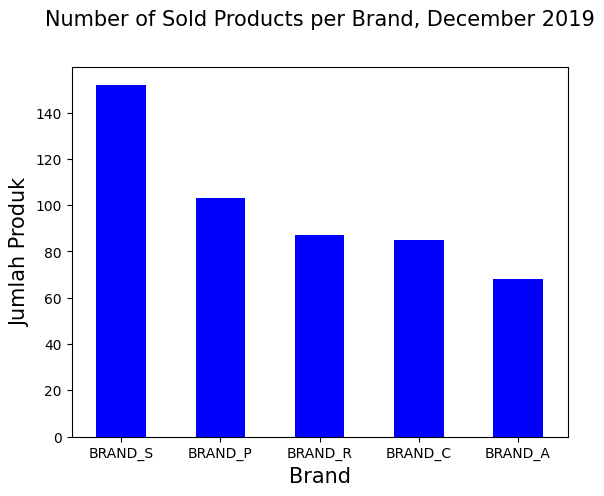

In [ ]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Jumlah Produk Terjual per brand, Desember 2019',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah Produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di
bulan Desember 2019. Apakah ada pola yang menarik?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

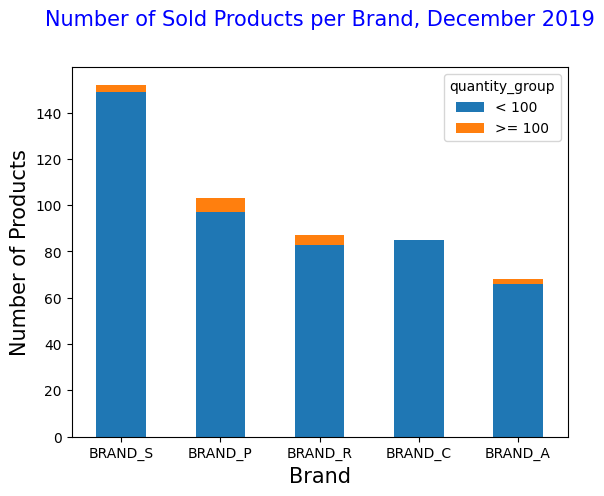

In [ ]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah Produk Terjual per brand, Desember',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap
product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah
atau yang mahal?

(0.0, 2000000.0)

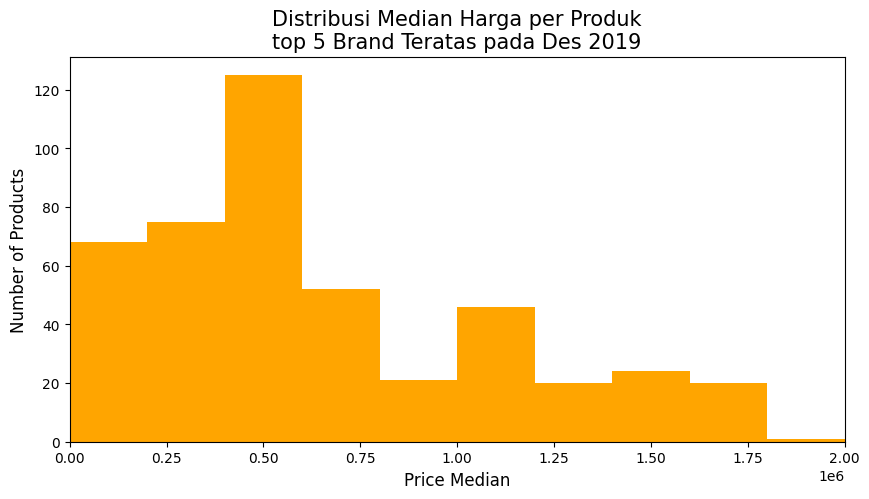

In [14]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='orange')
plt.title('Distribusi Median Harga per Produk\ntop 5 Brand Teratas pada Des 2019',fontsize=15, color='black')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan
median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

([<matplotlib.axis.YTick at 0x7f323ed36a70>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

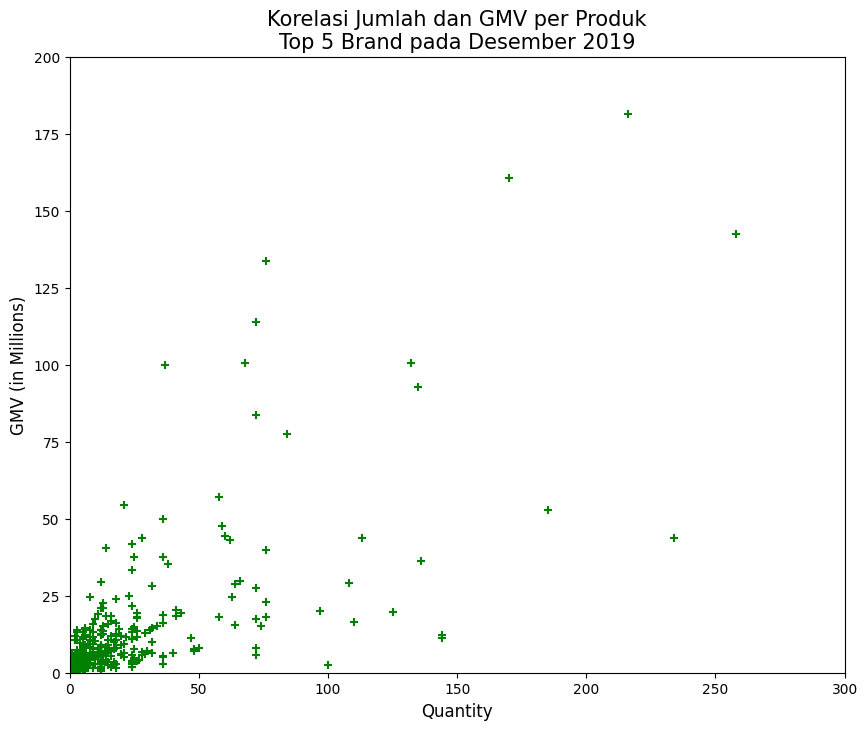

In [10]:
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='green')
plt.title('Korelasi Jumlah dan GMV per Produk\nTop 5 Brand pada Desember 2019',fontsize=15, color='black')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case
6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih
banyak?

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

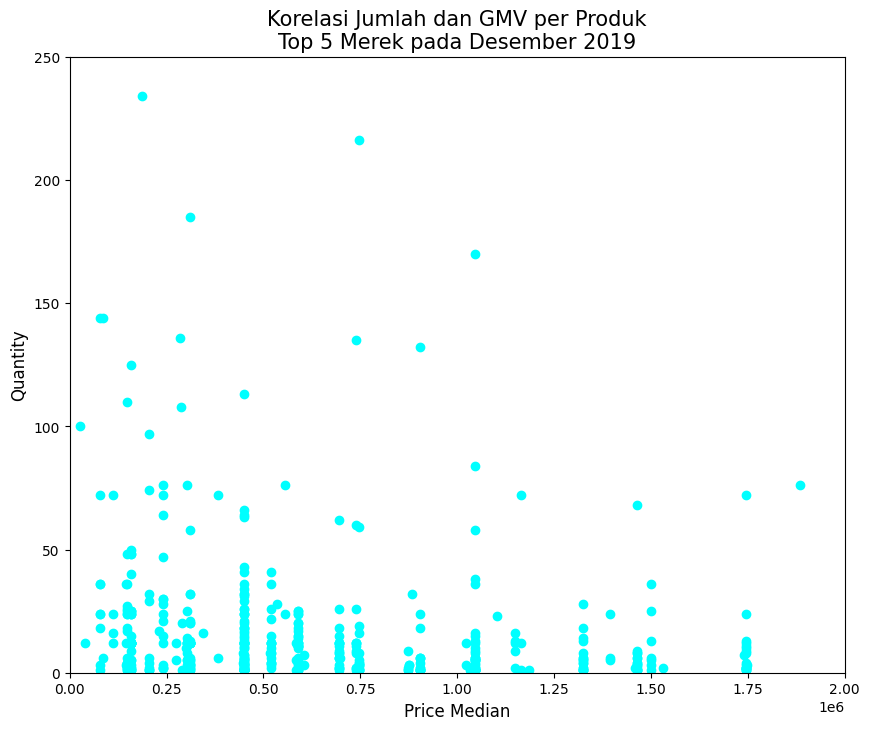

In [12]:
import matplotlib.pyplot as plt
plt.clf()

data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='cyan')
plt.title('Korelasi Jumlah dan GMV per Produk\nTop 5 Merek pada Desember 2019',fontsize=15, color='black')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)